In [7]:
import sys
sys.path.insert(0,'../../../')
import flexpart_management.notebooks.sulfate_simple_cluster_corr_paper. \
    sulfate_simple_cluster_corr_paper_lfc as lfc
from flexpart_management.notebooks.sulfate_simple_cluster_corr_paper. \
    sulfate_simple_cluster_corr_paper_lfc import *

In [ ]:
def main():

In [8]:
    sul = 'Sulfate'
    lab_name = 'lab_name'

In [9]:
    acsm = lfc.get_acsm_data()

/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

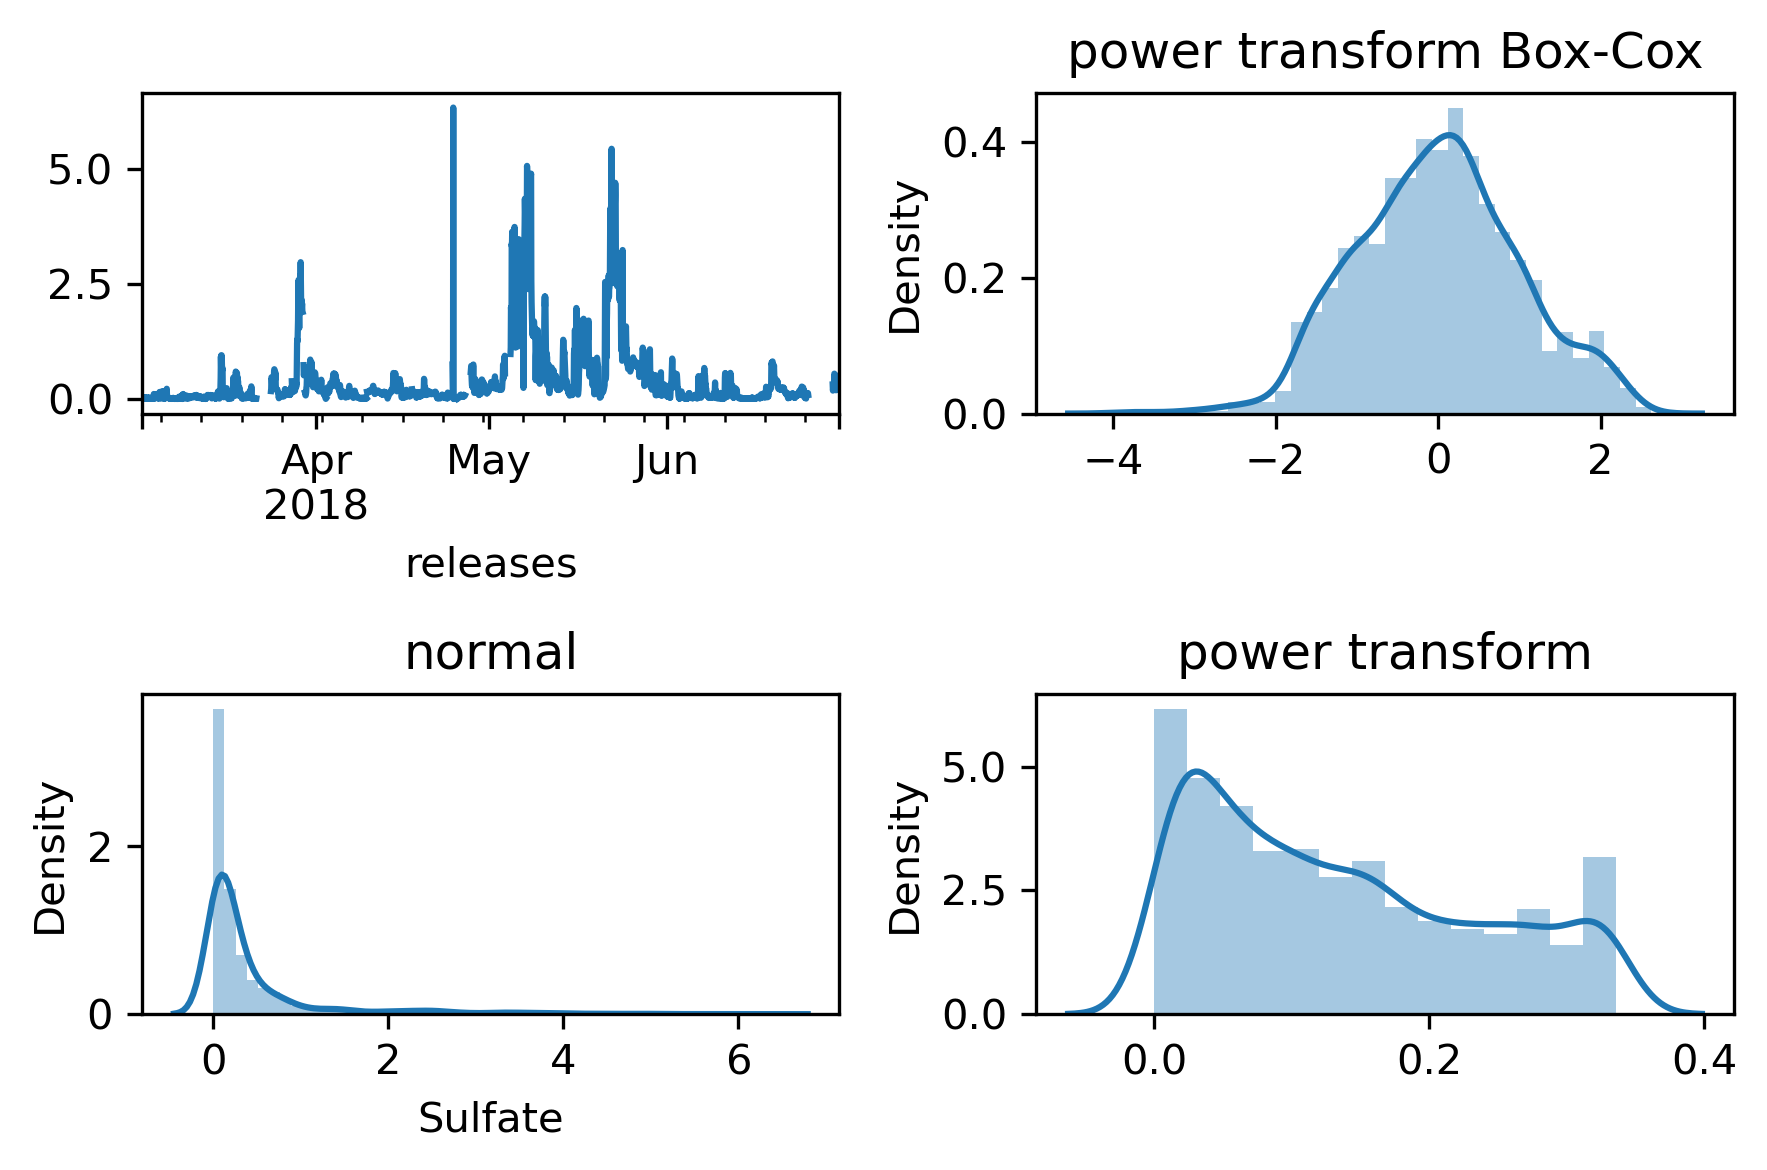

In [10]:
    lfc.plot_distributions(acsm, sul)

In [11]:
    ds = fa.open_temp_ds('ds_clustered_18_agl.nc')
    # ds['lab_name'] = ds['lab_name'][{co.RL: 0}]
    ds

<xarray.Dataset>
Dimensions:                             (R_CENTER: 31, TH_CENTER: 36, ZMID: 30, releases: 4248)
Coordinates:
    r_length                            (R_CENTER) float64 dask.array<chunksize=(31,), meta=np.ndarray>
  * R_CENTER                            (R_CENTER) float64 0.08046 ... 17.81
  * ZMID                                (ZMID) int64 250 750 ... 14250 14750
  * releases                            (releases) datetime64[ns] 2017-12-06 ...
  * TH_CENTER                           (TH_CENTER) float64 0.08727 ... 6.196
    ZLEN_M                              (TH_CENTER, R_CENTER, ZMID) float64 dask.array<chunksize=(36, 31, 30), meta=np.ndarray>
    LON                                 (R_CENTER, TH_CENTER) float64 dask.array<chunksize=(31, 36), meta=np.ndarray>
    LAT_00                              (R_CENTER, TH_CENTER) float64 dask.array<chunksize=(31, 36), meta=np.ndarray>
    LON_00                              (R_CENTER, TH_CENTER) float64 dask.array<chunksize=(31, 36), meta=np.ndarray>
    LAT_10                              (R_CENTER, TH_CENTER) float64 dask.array<chunksize=(31, 36), meta=np.ndarray>
    LON_10                              (R_CENTER, TH_CENTER) float64 dask.array<chunksize=(31, 36), meta=np.ndarray>
    LAT_11                              (R_CENTER, TH_CENTER) float64 dask.array<chunksize=(31, 36), meta=np.ndarray>
    LON_11                              (R_CENTER, TH_CENTER) float64 dask.array<chunksize=(31, 36), meta=np.ndarray>
    LAT_01                              (R_CENTER, TH_CENTER) float64 dask.array<chunksize=(31, 36), meta=np.ndarray>
    LON_01                              (R_CENTER, TH_CENTER) float64 dask.array<chunksize=(31, 36), meta=np.ndarray>
    GRIDAREA                            (R_CENTER, TH_CENTER) float64 dask.array<chunksize=(31, 36), meta=np.ndarray>
    TOPOGRAPHY                          (R_CENTER, TH_CENTER) float32 dask.array<chunksize=(31, 36), meta=np.ndarray>
    LAT                                 (R_CENTER, TH_CENTER) float64 dask.array<chunksize=(31, 36), meta=np.ndarray>
    VOL                                 (ZMID, R_CENTER, TH_CENTER) float64 dask.array<chunksize=(30, 31, 36), meta=np.ndarray>
Data variables:
    CONC                                (releases, ZMID, R_CENTER, TH_CENTER) float64 dask.array<chunksize=(4248, 30, 31, 36), meta=np.ndarray>
    CONC_smooth_t_300_z_25_r_100_th_50  (releases, ZMID, R_CENTER, TH_CENTER) float64 dask.array<chunksize=(4248, 30, 31, 36), meta=np.ndarray>
    conc_smooth_norm_r                  (releases, ZMID, R_CENTER, TH_CENTER) float64 dask.array<chunksize=(4248, 30, 31, 36), meta=np.ndarray>
    conc_smooth_norm                    (releases, ZMID, R_CENTER, TH_CENTER) float64 dask.array<chunksize=(4248, 30, 31, 36), meta=np.ndarray>
    lab                                 (releases, ZMID, R_CENTER, TH_CENTER) float64 dask.array<chunksize=(4248, 30, 31, 36), meta=np.ndarray>
    lab_name                            (releases, ZMID, R_CENTER, TH_CENTER) object dask.array<chunksize=(4248, 30, 31, 36), meta=np.ndarray>
    lab_nc06                            (releases, ZMID, R_CENTER, TH_CENTER) object dask.array<chunksize=(4248, 30, 31, 36), meta=np.ndarray>
Attributes:
    info:             {'smoothed': False, 'above_sea_level': True, 'z delta':...
    smoothed:         0
    above_sea_level:  1
    z delta:          500
    z levels:         30
    orig_name:        ds_above_sea_level.nc
    clustered:        1
    n_clusters:       8

In [ ]:
    _dic, cols, dj18 = lfc.get_corrs(acsm, ds, lab_name, sul)
    _dic6, cols6, dj6 = lfc.get_corrs(acsm, ds, 'lab_nc06', sul)

    lfc.plot_corrs(_dic, cols, sul)
    lfc.plot_corrs(_dic6, cols6, sul)

In [ ]:
    # s = splot(2,1,dpi=300,figsize=(7.25,4))
    lfc.plot_fig_comparison(_dic, cols, dj18, sul)

In [ ]:
    df18, df6, ticks, white_lines = lfc.get_dfs(_dic, _dic6, sul)

In [ ]:

    ds['lab_nc06'] = ds['lab_nc06'][{co.RL: [0]}].sum(co.RL)
    ds['lab_name'] = ds['lab_name'][{co.RL: [0]}].sum(co.RL)

In [ ]:

    dcc, dsn = lfc.get_dcc(ds)

In [ ]:
    d9 = dsn.where(dsn['lab_name'] == '09_MR').sum([co.RL, co.ZM])
    d9c = d9['CONC'].load()
    d10 = dsn.where(dsn['lab_name'] == '10_SR').sum([co.RL, co.ZM])
    d10c = d10['CONC'].load()

    d8M = dsn.where(dsn['lab_name'] == '08_SM').sum([co.RL, co.ZM])
    d8mc = d8M['CONC'].load()

    d7 = dsn.where(dsn['lab_name'] == '07_SR').sum([co.RL, co.ZM])
    d7c = d7['CONC'].load()

    d8 = dsn.where(dsn['lab_nc06'] == '08_PW').sum([co.RL, co.ZM])
    d8c = d8['CONC'].load()

In [ ]:
    f, gs, axa, axc, axd = lfc.plot_fig_corr_s04(
        _dic, cols, dcc, df18,
        df6, dj18, dj6, sul,
        ticks,
        white_lines, dsn)

    axb = lfc.plot_map2(d10c, d7c, d8c, d8mc, d9c, f, gs)

    axa.annotate(f'a', [-0.2, 1.05], xycoords='axes fraction', weight='bold')
    axb.annotate(f'b', [-0.05, 1.05], xycoords='axes fraction', weight='bold')
    axc.annotate(f'c', [0.0, 1.05], xycoords='axes fraction', weight='bold')
    axd.annotate(f'd', [0.0, 1.05], xycoords='axes fraction', weight='bold')

    f.subplots_adjust(hspace=.5)

    f.show()

    f.savefig(pjoin(co.paper_fig_path, 'pearson_corr_so4.pdf'))

In [ ]:


if __name__ == '__main__':
    main()